## Module 3: A Shallow Model For Non Linear Data

In this module, we will:

1. Generate a non linear dataset consisting of 1000 examples and each example has two features and one output.
2. Build a shallow neural network model with following features:
  1. Two layers
  2. First layer has four neurons
  3. Last layer has one neuron
  4. All neurons have sigmoid activation function
3. Train that model
4. Check the performance of our model on non-linear data

***

## Imports

Let's import the required packages and libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix, classification_report

## Creating a Complex Dataset

The previous dataset was linearly separable, so it was trivial for our simple model to separate the classes. Here is a more complex dataset which isn't linearly separable. The simple model won't be able to distinguish between the classes.
Let's create a dataset consisting of two features using the [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) of `sklearn.datasets`. 

In [2]:

x, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
y = y.reshape(1000,1)

---
### View the dataset
To view the data, let's use 'dataFrame` method of **pandas** libraray to view the data.
---

In [3]:
import pandas as pd
import numpy as np
data = {'feature-1': list(x[:,0]),
        'feature-2': list(x[:,1]),
        'target': list(y[:,0])}

data = pd.DataFrame(data)
data

,feature-1,feature-2,target
0,2.021001,0.490179,1
1,1.678201,-0.201987,1
2,-0.282245,0.858785,0
3,-0.021440,0.176281,1
4,0.504842,-0.391043,1
...,...,...,...
995,1.530638,-0.247243,1
996,0.333445,0.946734,0
997,0.325150,-0.328385,1
998,0.097571,0.118347,1


---
Let's visualize the data using the `plot` function of the `matplotlib.pyplot`.
---

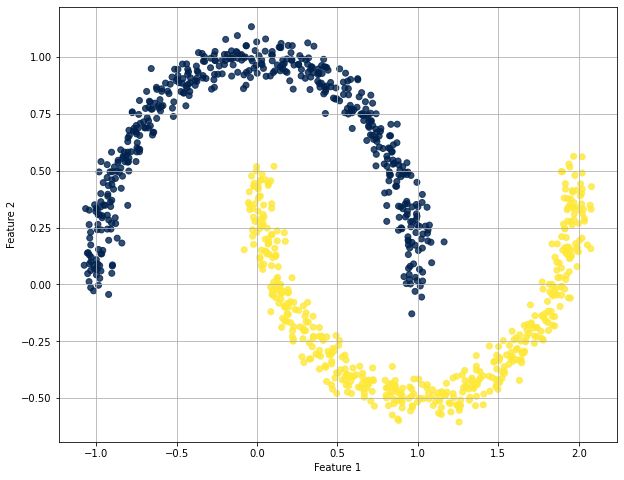

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.scatter(x[:,0], x[:,1],  c = y, alpha = 0.8, cmap = 'cividis', marker = 'o');
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid('on')

___
## Defining a simple model

Let's define a simple model, which consists of a single layer with single neuron. Further details are in the below code.

In [8]:
simple_model = Sequential(name = 'Simple_Model') 
simple_model.add(Dense(units = 4,  activation='sigmoid', input_shape=(2,),name='Layer_1'))
simple_model.add(Dense(units = 1, activation='sigmoid', name = 'Layer_2'))
print(simple_model.summary())

simple_model.compile(optimizer=Adam(),
                     loss=BinaryCrossentropy(),
                     metrics=['accuracy'])

# Let's train for 100 epochs
history = simple_model.fit(x=x, y=y, verbose=0, epochs=50)

Model: "Simple_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
Layer_2 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None


***
## Performance of Our Model

In the following code, we have written a function required to draw the decision boundary.

In [9]:
def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    # cm = plt.cm.RdBu
    # cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc,  alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

### Plot the Decision Boundary

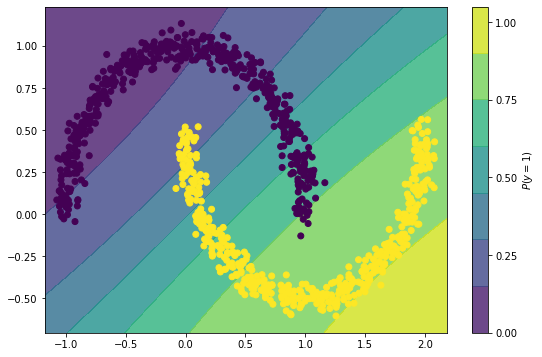

In [12]:
plot_decision_boundary(lambda x: simple_model.predict(x), x, y)

It is visible that our model is not successful in seperating the two classes, but its performance is better than the previous simple model.

### Plotting the Confusion Matrix

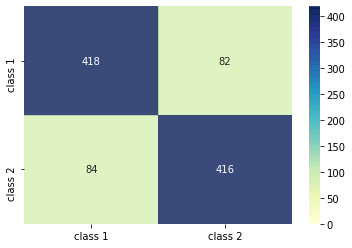

In [13]:
import seaborn as sns
x_axis_labels = ['class 1', 'class 2'] # labels for x-axis
y_axis_labels = ['class 1', 'class 2'] # labels for y-axis 
y_pred = simple_model.predict(x, verbose=0)
y_pred = np.where(y_pred > 0.5, 1,0)
sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)),
            annot=True, fmt='d', cmap='YlGnBu', 
            alpha=0.8, vmin=0, xticklabels=x_axis_labels, yticklabels=y_axis_labels);


***
### Measing Models Performance

When you build a model for a classification problem you almost always want to look at the accuracy of that model as the number of correct predictions from all predictions made. This is the **classification accuracy**.

Once you have a model that you believe can make robust predictions you need to decide whether it is a good enough model to solve your problem. Classification accuracy alone is typically not enough information to make this decision.

#### [Precision](https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/)
The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly). The precision measures the model's accuracy in classifying a sample as positive.

\begin{equation}
Precision = \frac{True \ Positive}{True \ Positive + False \ Positive}
\end{equation} 

#### [Recall](https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/)

The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

\begin{equation}
Precision = \frac{True \ Positive}{True \ Positive + False \ Negative}
\end{equation} 

The recall cares only about how the positive samples are classified. This is independent of how the negative samples are classified, e.g. for the precision. When the model classifies all the positive samples as Positive, then the recall will be $100\%$ even if all the negative samples were incorrectly classified as Positive. 

#### [F1 Score](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/#:~:text=The%20F1%20Score%20is%20the,0%2B0%20or%200.)



The F1 Score score conveys the balance between the precision and the recall, and it is measured as follows:

\begin{equation}
F1 \ Score = 2*\frac{Precision \times Recall}{Precision + Recall}
\end{equation}



***

In [14]:
y_pred = simple_model.predict(x, verbose=0)
y_pred = np.where(y_pred > 0.5, 1,0)
target_names = ['class 1', 'class 2']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.83      0.84      0.83       500
     class 2       0.84      0.83      0.83       500

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

